In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 导入数据，探索数据

In [2]:
data = pd.read_csv('userlostprob.txt',sep="\t")

In [3]:
data.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


In [4]:
data.shape


(689945, 51)

In [5]:
#去重
data.drop_duplicates()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21
5,1,24645,2016-05-18,2016-05-20,0,NaN,NaN,NaN,1.02,NaN,...,408.0,NaN,NaN,2.880,0.427,NaN,NaN,1,NaN,21
6,0,24647,2016-05-18,2016-05-25,0,NaN,NaN,NaN,1.12,NaN,...,145.0,NaN,NaN,4.427,0.493,NaN,NaN,1,NaN,22
7,0,24650,2016-05-18,2016-05-20,0,3.0,NaN,21.0,1.11,0.79,...,204.0,10475.0,0.53,12.713,1.987,7566.0,1.50,23,1265.0,17
8,0,24652,2016-05-18,2016-05-19,0,13.0,NaN,NaN,1.08,NaN,...,99.0,NaN,0.41,5.393,0.860,15.0,1.00,20,596.0,20
9,0,24653,2016-05-18,2016-06-08,1,2.0,NaN,7.0,1.07,0.86,...,191.0,18873.0,0.52,3.093,0.287,288.0,1.00,31,21926.0,7


In [6]:
#描述性统计
data.describe(include='all',percentiles=([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.99])).T

,count,unique,top,freq,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,99%,max
label,689945,NaN,NaN,NaN,0.274452,0.446238,0,0,0,0,0,0,0,0,1,1,1
sampleid,689945,NaN,NaN,NaN,628540,414681,24636,139846,254991,369941,484845,599637,715004,830165,944802,2.22689e+06,2.23843e+06
d,689945,7,2016-05-20,111985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival,689945,37,2016-05-20,110982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iforderpv_24h,689945,NaN,NaN,NaN,0.193737,0.395226,0,0,0,0,0,0,0,0,0,1,1
decisionhabit_user,385450,NaN,NaN,NaN,5.31705,38.5245,0,1,1,2,2,3,4,5,6,27,3167
historyvisit_7ordernum,82915,NaN,NaN,NaN,1.85609,2.10386,1,1,1,1,1,1,2,2,2,7,106
historyvisit_totalordernum,386525,NaN,NaN,NaN,11.7105,17.2514,1,1,2,3,4,6,8,11,17,82,711
hotelcr,689148,NaN,NaN,NaN,1.061,0.0452643,1,1.01,1.02,1.03,1.04,1.05,1.06,1.08,1.09,1.19,3.18
ordercanceledprecent,447831,NaN,NaN,NaN,0.342119,0.35421,0,0,0,0.01,0.09,0.25,0.39,0.5,0.67,1,1


In [7]:
#查看缺失值占比
data.isnull().mean().sort_values()

label                               0.000000
sid                                 0.000000
iforderpv_24h                       0.000000
h                                   0.000000
d                                   0.000000
sampleid                            0.000000
arrival                             0.000000
hotelcr                             0.001155
hoteluv                             0.001155
lowestprice                         0.002919
cityuvs                             0.011118
cancelrate                          0.016984
novoters                            0.024679
customereval_pre2                   0.041500
landhalfhours                       0.041500
uv_pre2                             0.041679
lowestprice_pre2                    0.042440
uv_pre                              0.042608
cr_pre                              0.042608
lowestprice_pre                     0.043853
novoters_pre2                       0.046857
cancelrate_pre                      0.053526
cityorders

In [8]:
np.sum(data.isnull().mean()>0)

44

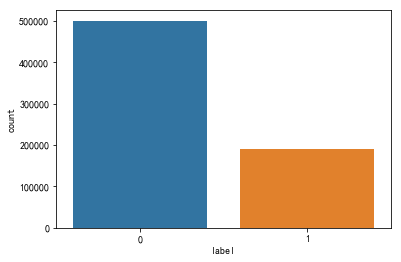

In [9]:
sns.countplot('label',data=data)

# 数据预处理

In [10]:
#生成衍生变量，预定日期
data['arrival'] = pd.to_datetime(data['arrival'])
data['d'] = pd.to_datetime(data['d'])

In [11]:
data['Scheduled_date'] = (data['arrival']-data['d']).dt.days

In [12]:
data.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,Scheduled_date
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,...,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12,0
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,...,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14,0
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,...,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19,1
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,...,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16,0
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,...,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21,1


In [13]:
#删除缺失值为88%以上的列
data.drop(columns="historyvisit_7ordernum",inplace=True)

In [14]:
#过滤没用的特征
features = []
for i in data.columns:
    if i not in ['sampleid', 'd', 'arrival']:
        features.append(i)

In [15]:
data[features]

,label,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,...,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,Scheduled_date
0,0,0,NaN,NaN,1.04,NaN,22.0,NaN,1089.0,NaN,...,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12,0
1,1,0,NaN,NaN,1.06,NaN,0.0,NaN,5612.0,NaN,...,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14,0
2,0,0,NaN,NaN,1.05,NaN,3.0,NaN,256.0,NaN,...,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19,1
3,0,0,NaN,NaN,1.01,NaN,2.0,NaN,NaN,NaN,...,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16,0
4,1,0,NaN,NaN,1.00,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21,1
5,1,0,NaN,NaN,1.02,NaN,0.0,NaN,15.0,NaN,...,NaN,NaN,2.880,0.427,NaN,NaN,1,NaN,21,2
6,0,0,NaN,NaN,1.12,NaN,0.0,NaN,2578.0,NaN,...,NaN,NaN,4.427,0.493,NaN,NaN,1,NaN,22,7
7,0,0,3.0,21.0,1.11,0.79,0.0,395.0,NaN,75.4,...,10475.0,0.53,12.713,1.987,7566.0,1.50,23,1265.0,17,2
8,0,0,13.0,NaN,1.08,NaN,0.0,NaN,2572.0,NaN,...,NaN,0.41,5.393,0.860,15.0,1.00,20,596.0,20,1
9,0,1,2.0,7.0,1.07,0.86,47.0,6.0,NaN,70.0,...,18873.0,0.52,3.093,0.287,288.0,1.00,31,21926.0,7,21


In [16]:
data_x = data[features]

In [17]:
#找出有负数的列
for i in data_x.columns:
    if data_x[i].min()<0:
        print(i)

delta_price1
lowestprice
delta_price2
customer_value_profit
ctrip_profits
deltaprice_pre2_t1


In [18]:
#异常值负数处的处理
#共6列有负值，其中deltaprice_pre2_t1（24小时内已访问酒店价格与对手价差均值）正常，所以余5列，分别为客户价值（ctrip_profits），客户价值近1年（customer_value_profit）、用户偏好价格-24小时浏览最多酒店价格（delta_price1）、用户偏好价格-24小时浏览酒店平均价格（delta_price2）、当年酒店可订最低价（lowestprice）
#customer_value_profit、ctrip_profits 替换为0
#delta_price1、delta_price2、lowestprice按中位数处理
data_x.loc[data_x.customer_value_profit<0,'customer_value_profit'] = 0
data_x.loc[data_x.ctrip_profits<0,'ctrip_profits'] = 0
data_x.loc[data_x.delta_price1<0,'delta_price1'] = data_x['delta_price1'].median()
data_x.loc[data_x.delta_price2<0,'delta_price2'] = data_x['delta_price2'].median()
data_x.loc[data_x.lowestprice<0,'lowestprice'] = data_x['lowestprice'].median()

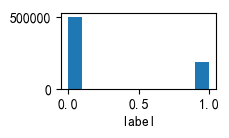

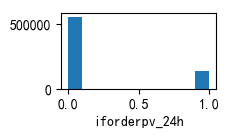

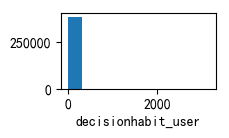

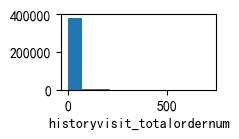

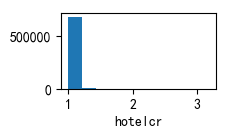

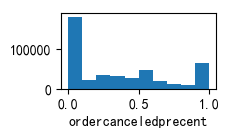

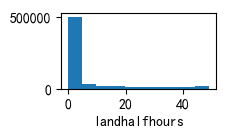

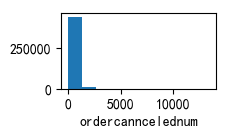

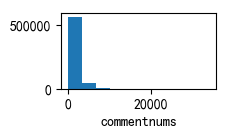

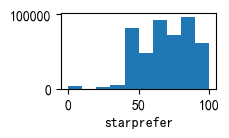

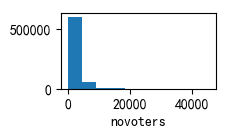

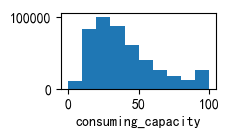

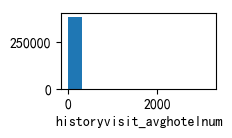

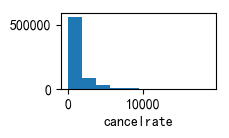

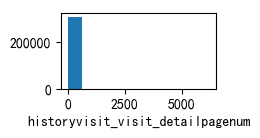

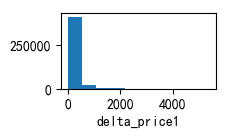

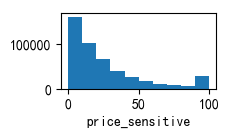

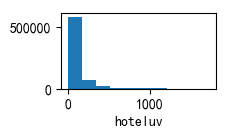

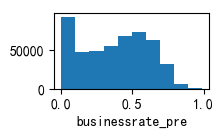

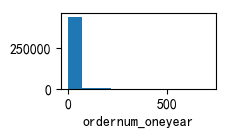

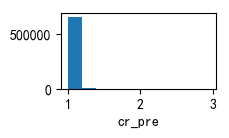

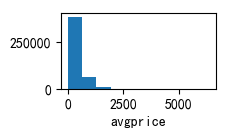

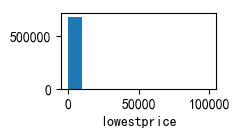

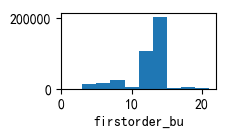

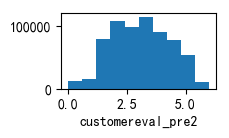

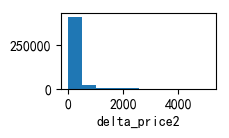

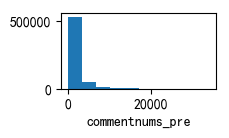

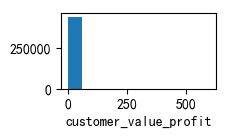

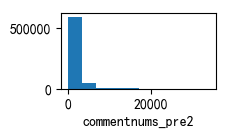

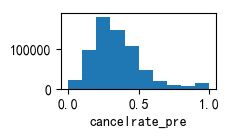

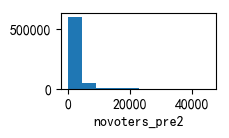

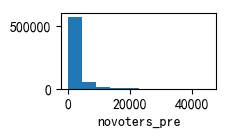

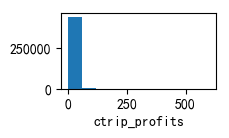

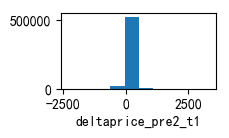

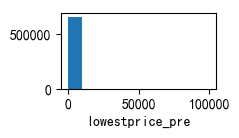

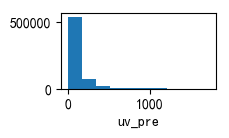

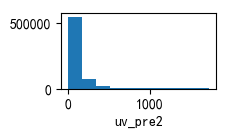

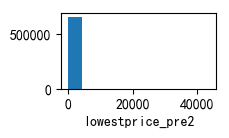

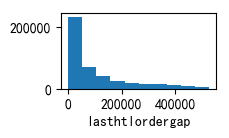

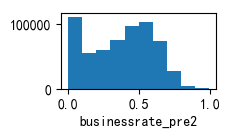

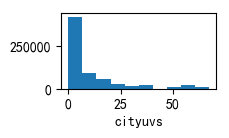

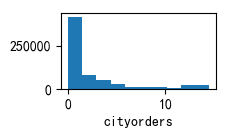

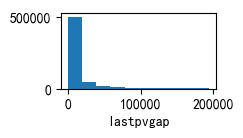

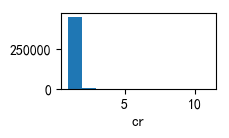

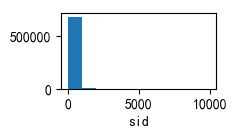

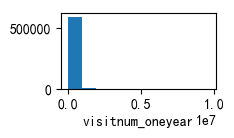

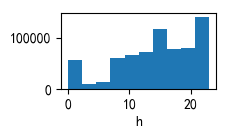

In [19]:
# 缺失值填充
for i in range(0,47):
    plt.figure(figsize=(2,1),dpi=100)
    plt.hist(data_x[data_x.columns[i]].dropna().get_values())
    plt.xlabel(data_x.columns[i])
plt.show()

In [20]:
# 趋于正态分布的字段，使用均值填充：3个字段businessrate_pre、customereval_pre2、businessrate_pre2
data_x['businessrate_pre']=data_x['businessrate_pre'].fillna(data_x['businessrate_pre'].mean())
data_x['businessrate_pre2']=data_x['businessrate_pre2'].fillna(data_x['businessrate_pre2'].mean())
data_x['customereval_pre2']=data_x['customereval_pre2'].fillna(data_x['customereval_pre2'].mean())

In [21]:
# 右偏分布使用中位数填充
def fil(data):
    for i in range(0,47):
        data[data.columns[i]]=data[data.columns[i]].fillna(data[data.columns[i]].median())
    return data

In [22]:
fil(data_x).head()

,label,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,...,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,Scheduled_date
0,0,0,3.0,6.0,1.04,0.25,22.0,2.0,1089.0,69.4,...,46890.0,0.290000,12.880,3.147,2848.0,1.05,7,1315.0,12,0
1,1,0,3.0,6.0,1.06,0.25,0.0,2.0,5612.0,69.4,...,46890.0,0.530000,17.933,4.913,2848.0,1.05,33,1315.0,14,0
2,0,0,3.0,6.0,1.05,0.25,3.0,2.0,256.0,69.4,...,46890.0,0.600000,3.993,0.760,2848.0,1.05,10,1315.0,19,1
3,0,0,3.0,6.0,1.01,0.25,2.0,2.0,514.0,69.4,...,46890.0,0.180000,3.220,0.660,2848.0,1.05,8,1315.0,16,0
4,1,0,3.0,6.0,1.00,0.25,0.0,2.0,514.0,69.4,...,46890.0,0.368237,0.013,0.627,2848.0,1.05,1,1315.0,21,1


In [23]:
# 查看缺失值比例
data_x.isnull().mean()

label                               0.0
iforderpv_24h                       0.0
decisionhabit_user                  0.0
historyvisit_totalordernum          0.0
hotelcr                             0.0
ordercanceledprecent                0.0
landhalfhours                       0.0
ordercanncelednum                   0.0
commentnums                         0.0
starprefer                          0.0
novoters                            0.0
consuming_capacity                  0.0
historyvisit_avghotelnum            0.0
cancelrate                          0.0
historyvisit_visit_detailpagenum    0.0
delta_price1                        0.0
price_sensitive                     0.0
hoteluv                             0.0
businessrate_pre                    0.0
ordernum_oneyear                    0.0
cr_pre                              0.0
avgprice                            0.0
lowestprice                         0.0
firstorder_bu                       0.0
customereval_pre2                   0.0


In [24]:
#异常值的处理
data1 = np.array(data_x)  #将data_x替换成numpy格式
for i in range(0,len(data1[0])): #列循环，以便取到每列的值
    a = data1[:,i] #将每列的值赋值到a
    b = np.percentile(a,1) #计算1百分位数据
    c = np.percentile(a,99) #计算99百分位数据
    for j in range(0,len(data1[:,0])):   #j从0到一列数据的总个数循环
        if a[j] < b:                      #如果data1里的第i列里的第j个数小于1%分位数
            a[j] = b                      #就把data1里的第i列里的第j个数换成1%分位数
        elif a[j] > c:                   #如果data1里的第i列里的第j个数大于99%分位数
            a[j] = c                        #就把data1里的第i列里的第j个数换成99%分位数
        else:
            a[j]                           #如果大于1%分位数小于99%分位数的值，则返回原值

In [25]:
data1=pd.DataFrame(data1,columns=features)
data1.head()

,label,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,...,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,Scheduled_date
0,0.0,0.0,3.0,6.0,1.04,0.25,22.0,2.0,1089.0,69.4,...,46890.0,0.290000,12.880,3.147,2848.0,1.05,7.0,1315.0,12.0,0.0
1,1.0,0.0,3.0,6.0,1.06,0.25,0.0,2.0,5612.0,69.4,...,46890.0,0.530000,17.933,4.913,2848.0,1.05,33.0,1315.0,14.0,0.0
2,0.0,0.0,3.0,6.0,1.05,0.25,3.0,2.0,256.0,69.4,...,46890.0,0.600000,3.993,0.760,2848.0,1.05,10.0,1315.0,19.0,1.0
3,0.0,0.0,3.0,6.0,1.01,0.25,2.0,2.0,514.0,69.4,...,46890.0,0.180000,3.220,0.660,2848.0,1.05,8.0,1315.0,16.0,0.0
4,1.0,0.0,3.0,6.0,1.00,0.25,0.0,2.0,514.0,69.4,...,46890.0,0.368237,0.013,0.627,2848.0,1.05,1.0,1315.0,21.0,1.0


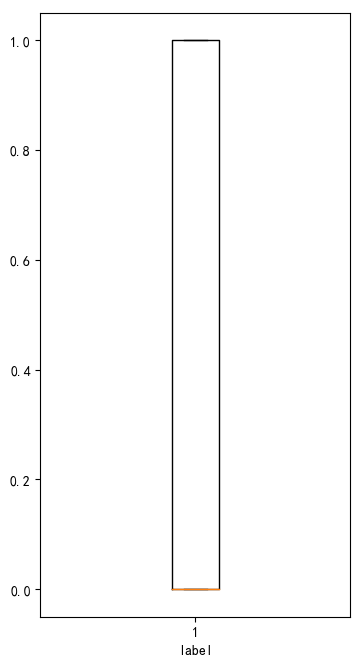

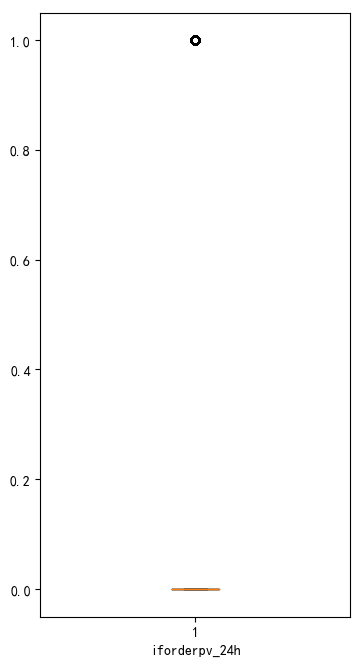

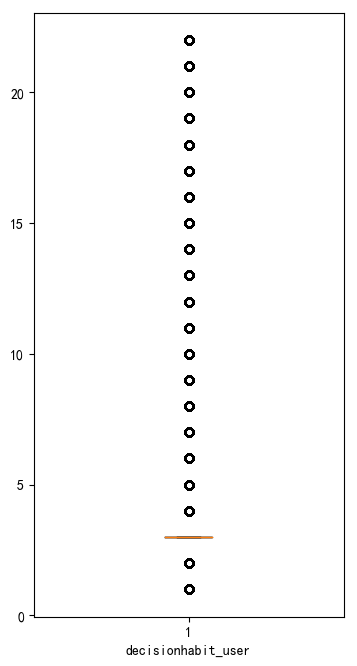

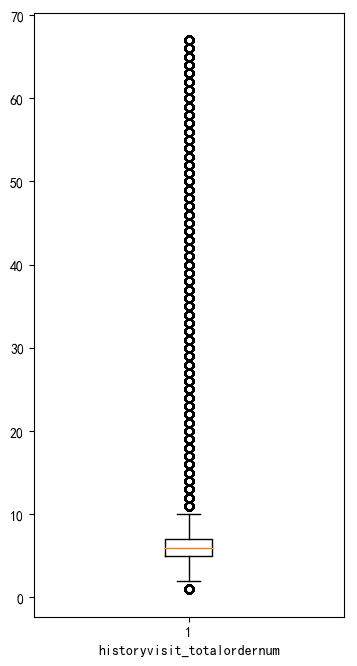

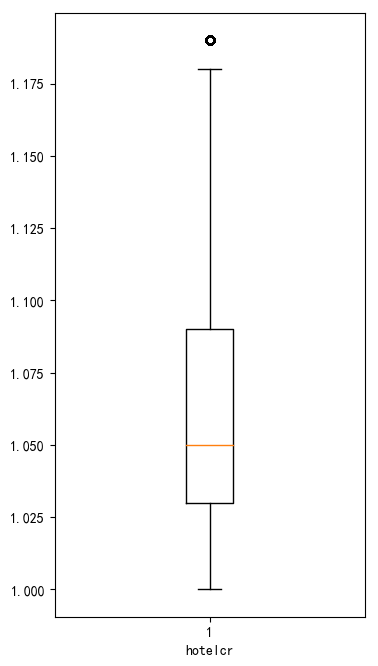

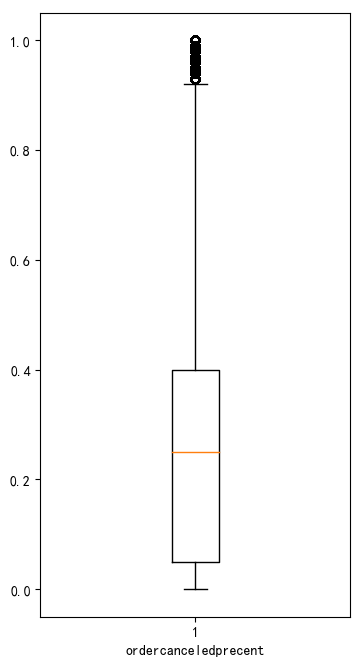

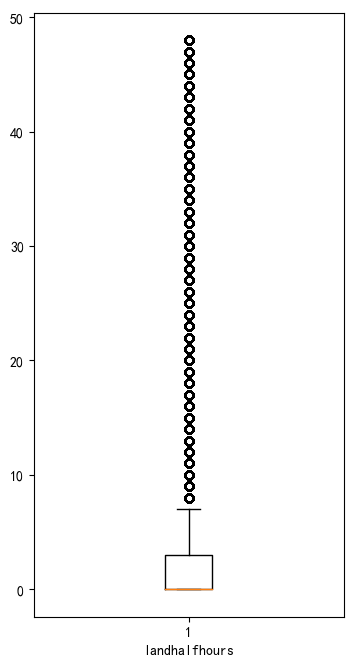

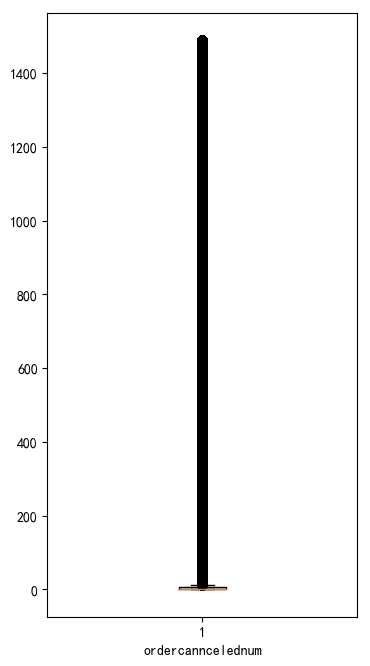

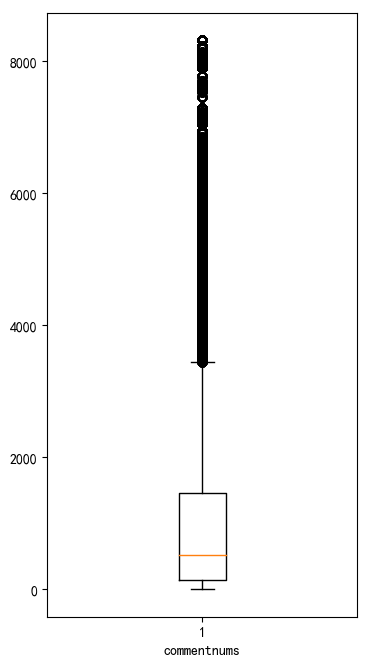

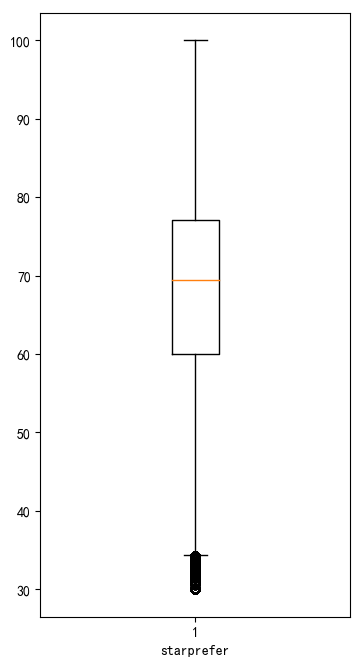

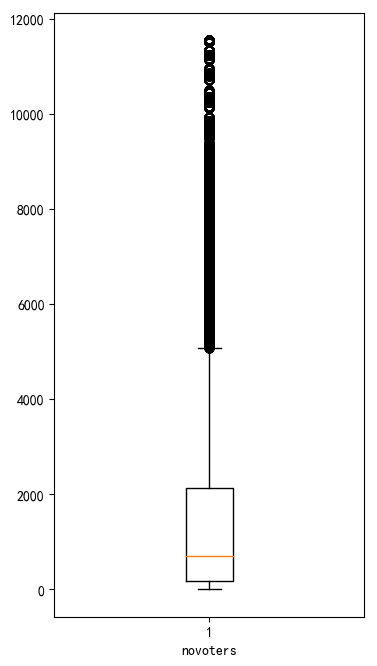

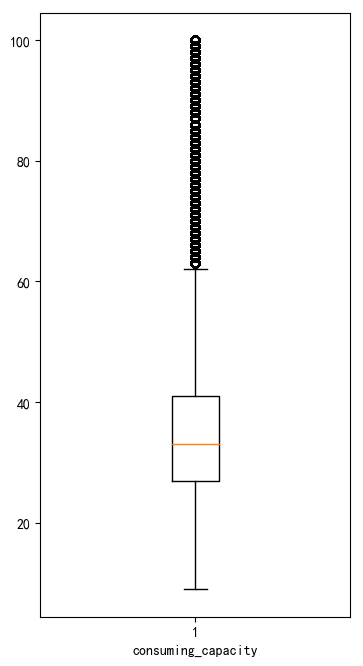

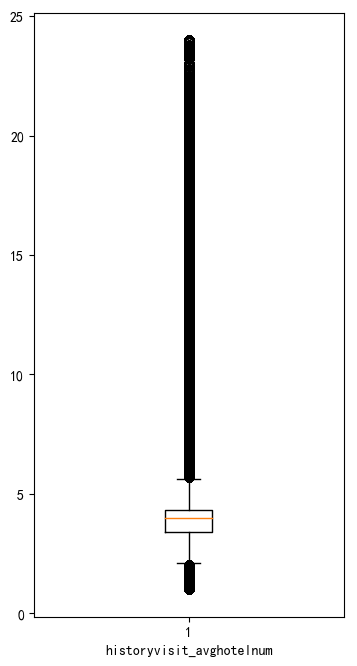

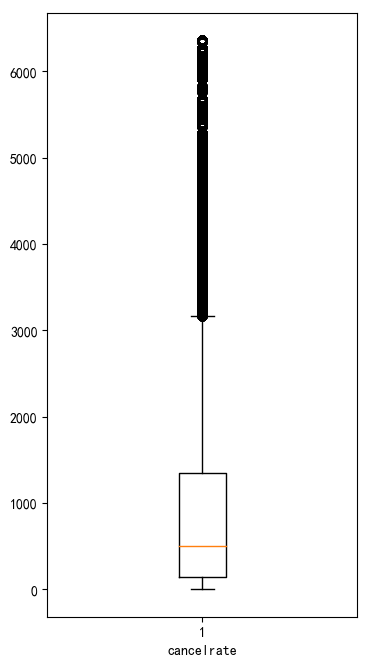

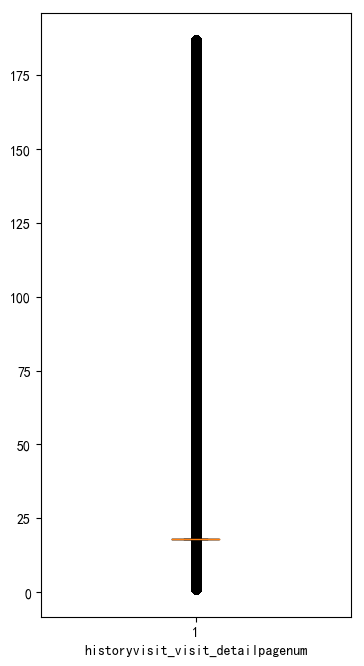

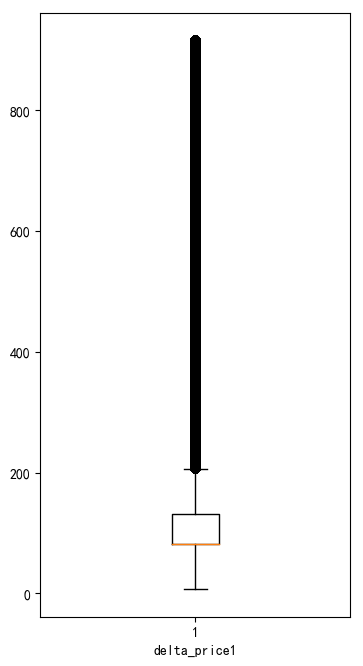

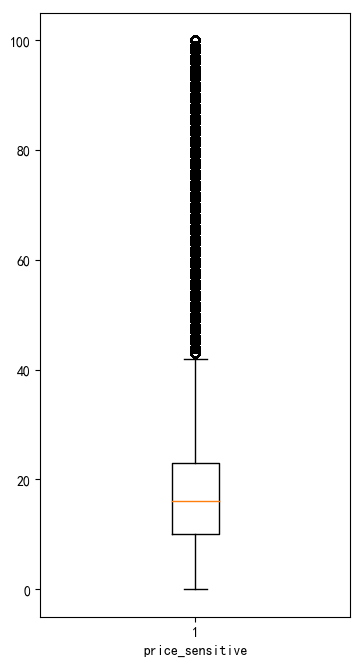

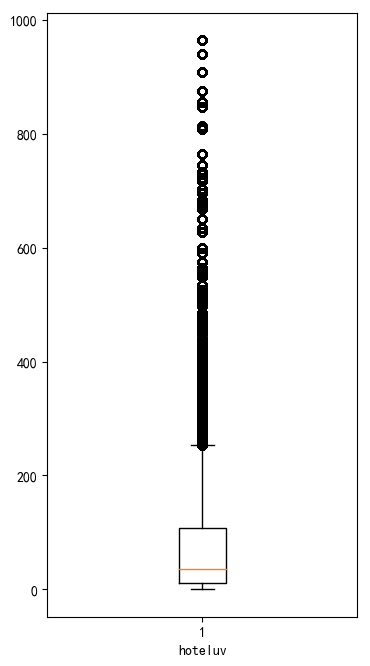

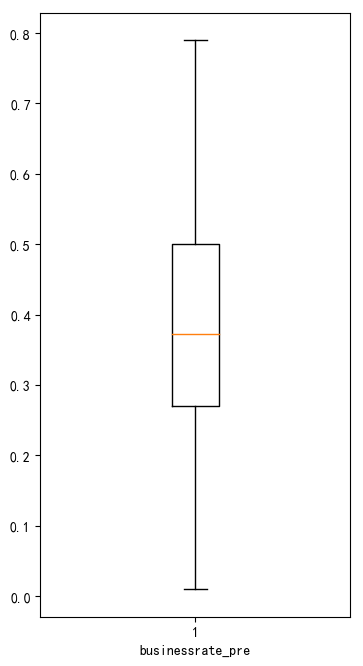

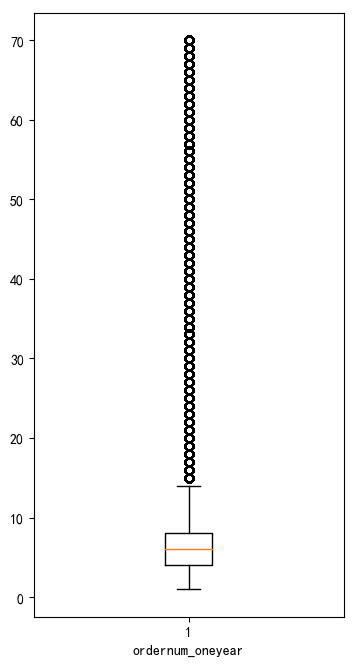

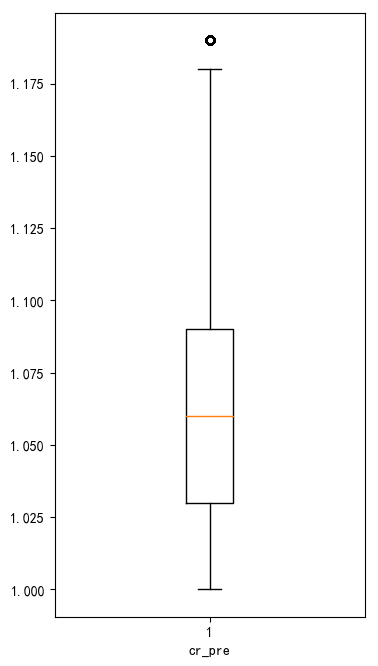

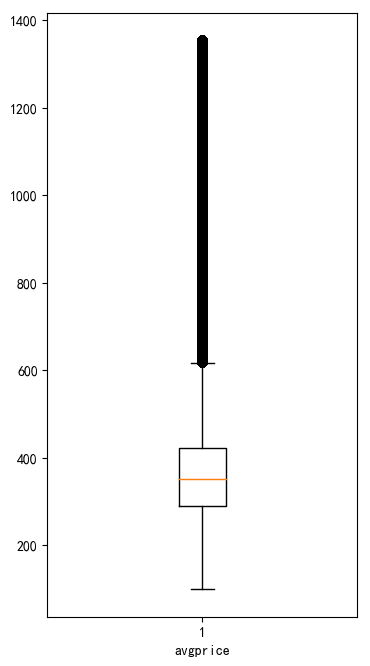

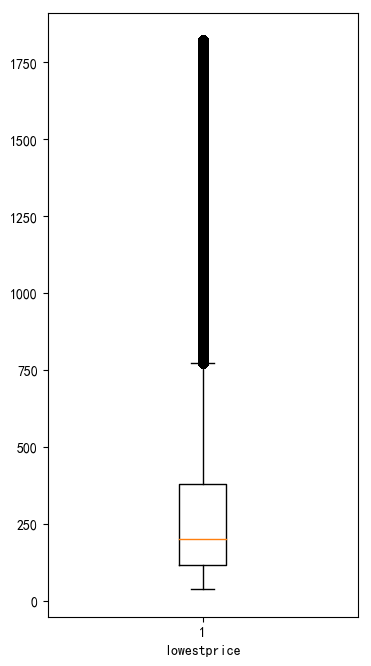

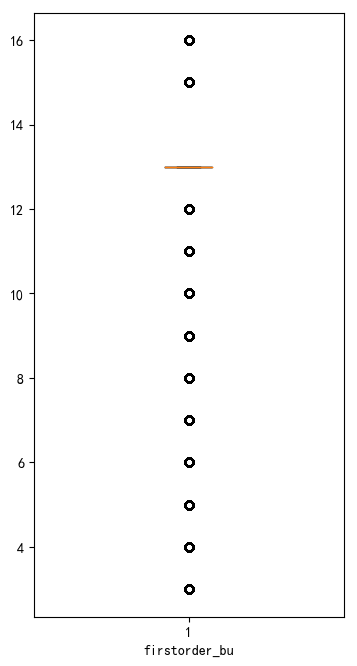

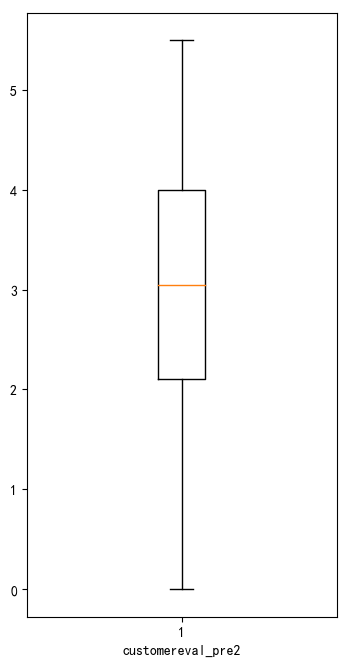

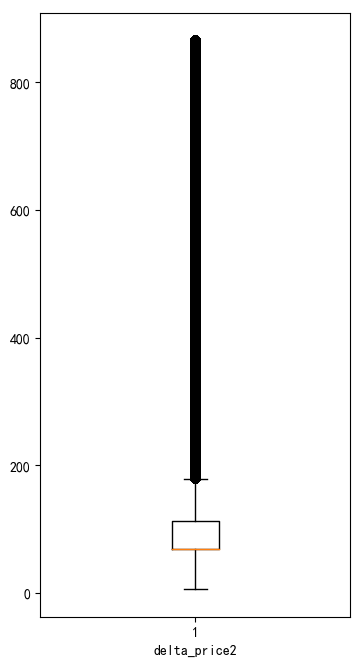

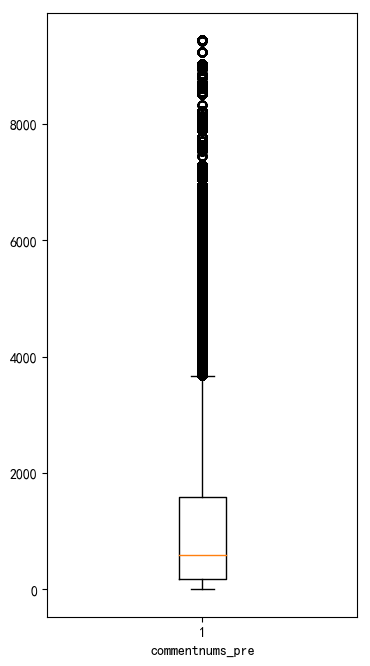

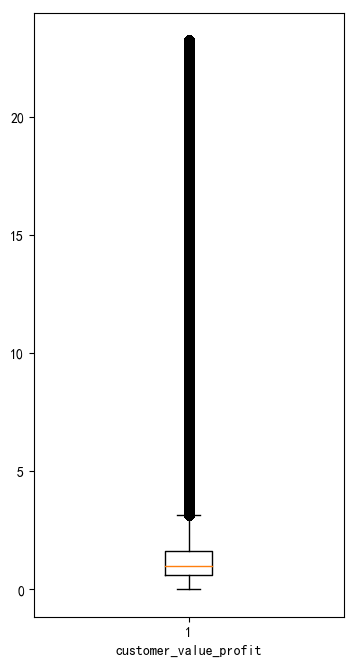

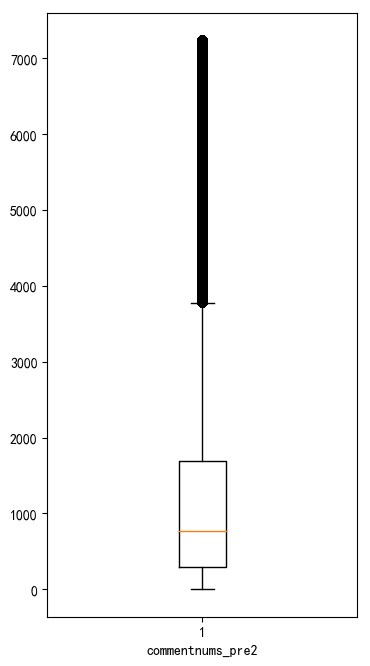

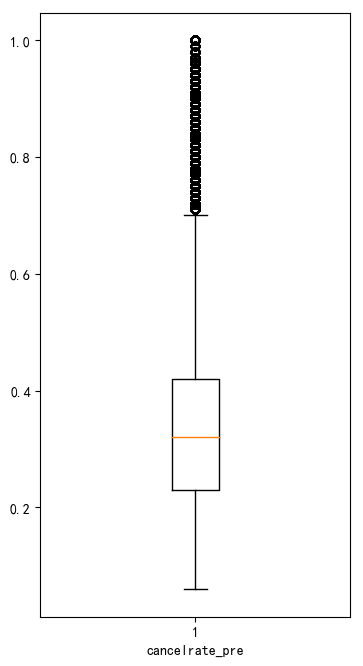

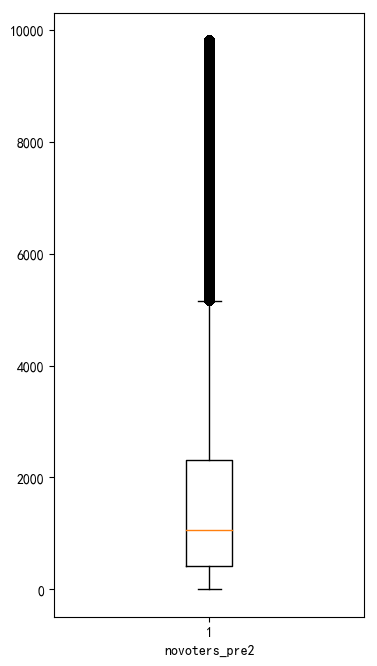

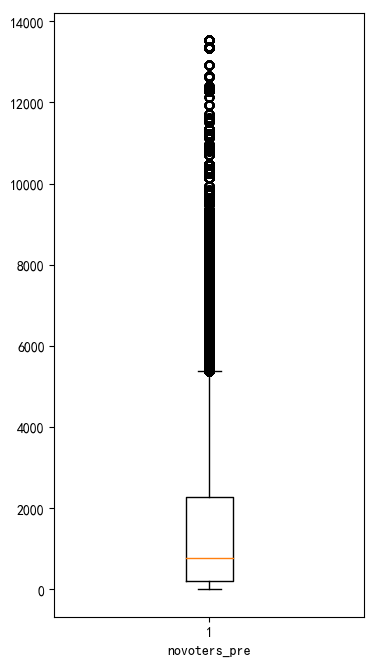

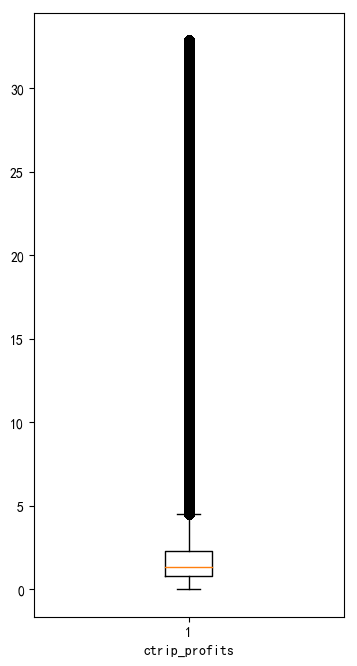

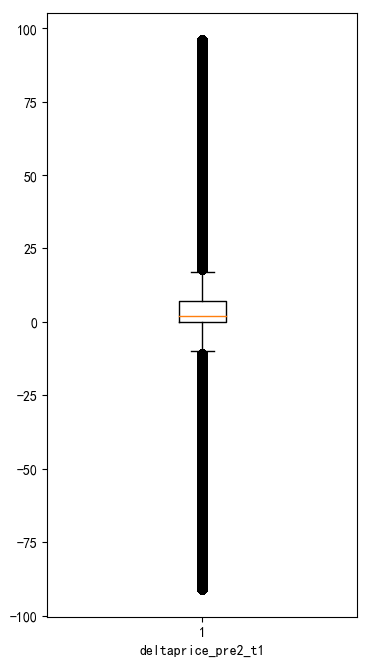

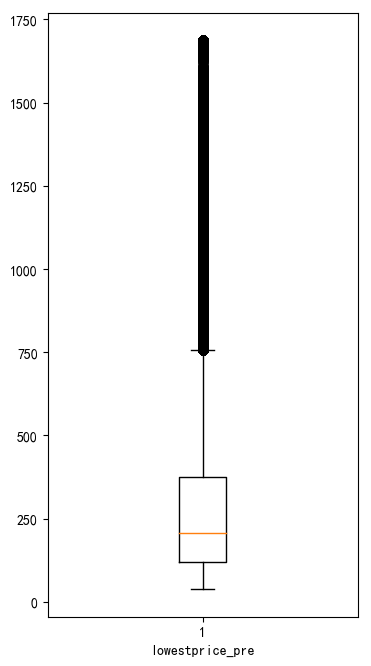

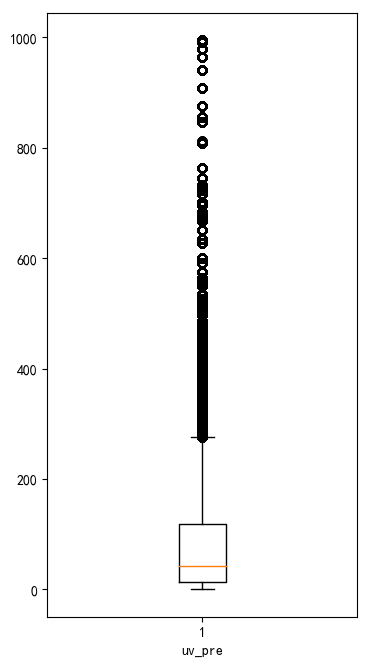

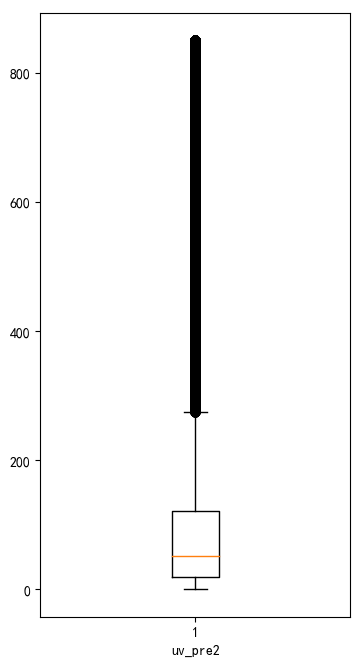

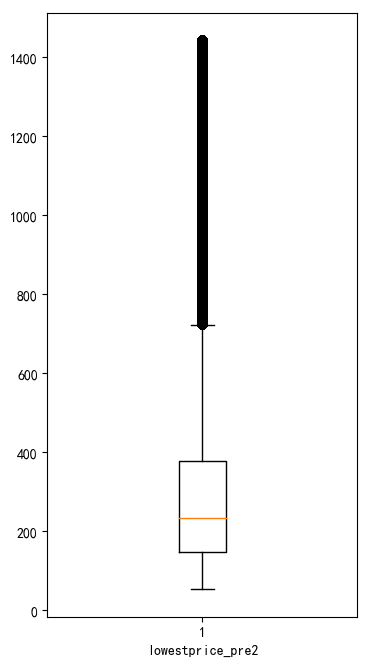

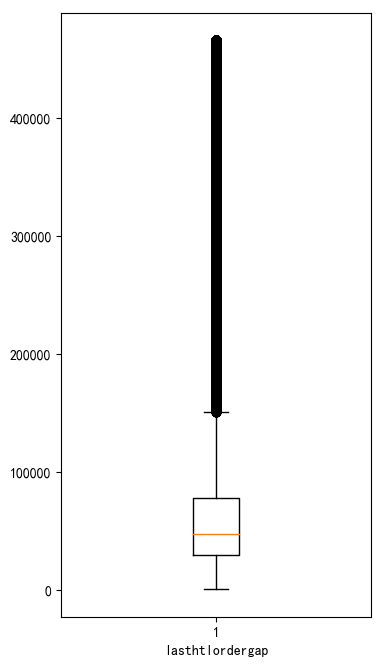

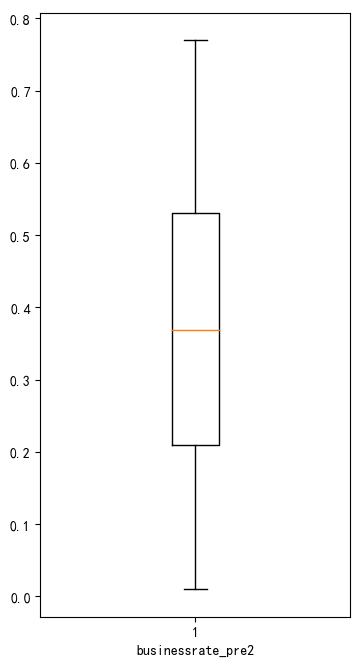

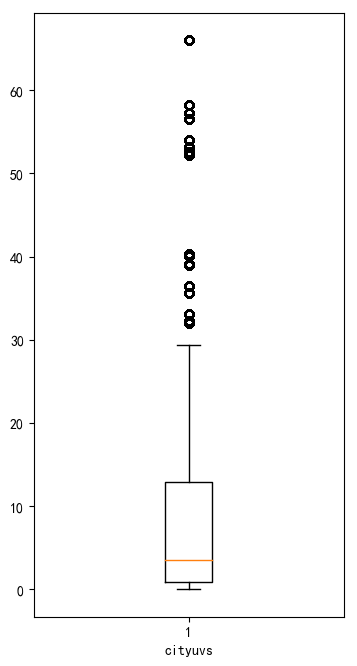

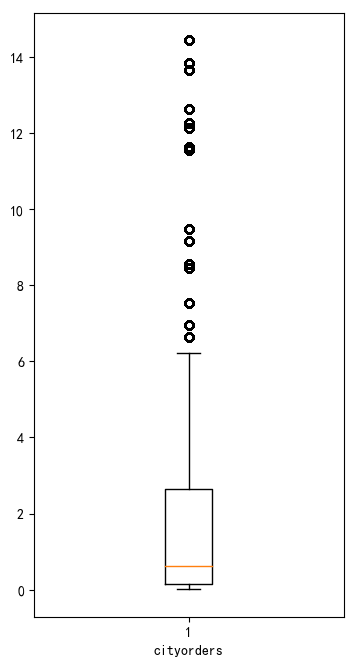

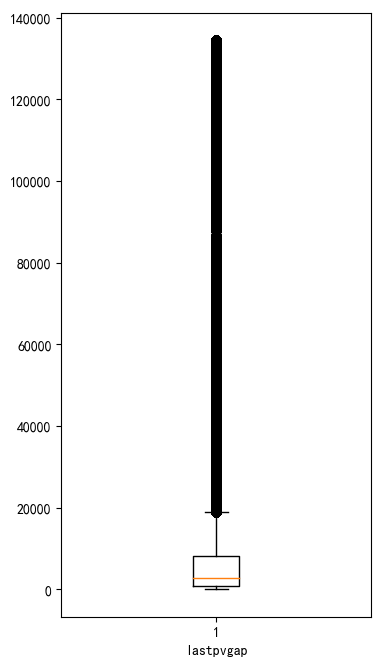

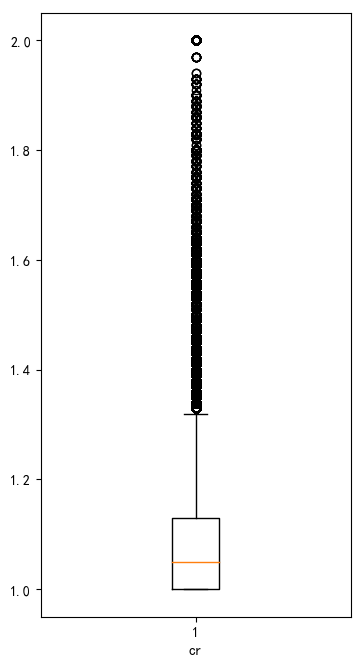

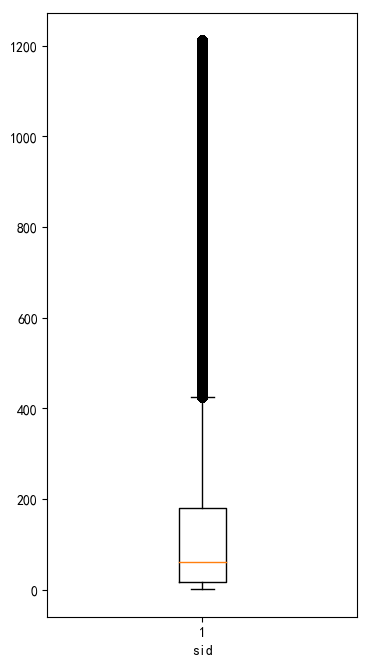

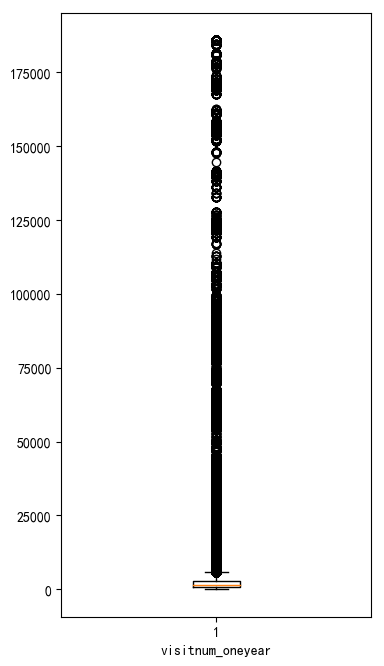

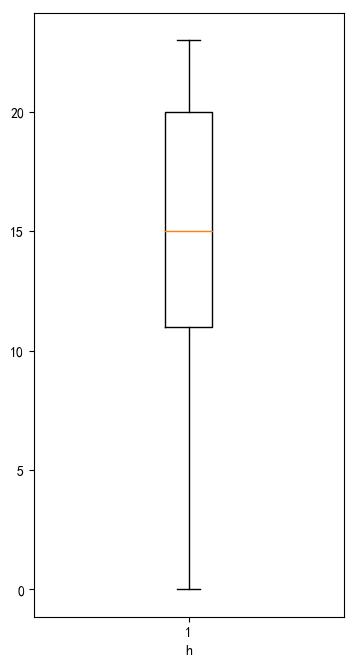

In [26]:
#检查处理后数据（极值和负值）
#箱线图检查极值
for i in range(0,47):
    plt.figure(figsize=(4,8),dpi=100)
    plt.boxplot(data1[data1.columns[i]].dropna().get_values())
    plt.xlabel(data1.columns[i])
plt.show()

In [27]:
# 查看最小值是否是负数
list_check = ['ctrip_profits','customer_value_profit','delta_price1','delta_price2','lowestprice']
for i in list_check:
    print(data1[i].min()) 

0.0
0.0
7.0
6.0
37.0


## 相关系数

In [28]:
corrdf = data1.corr() 
corrdf.to_csv( '相关性矩阵.csv' , index = False )

In [29]:
corrdf

,label,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,...,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,Scheduled_date
label,1.000000,0.110308,-0.014135,0.142437,0.121993,0.012848,0.030844,0.110617,0.002726,-0.013082,...,-0.058852,0.131459,0.101187,0.102336,0.010801,0.184888,0.016431,-0.049722,-0.077728,-0.153983
iforderpv_24h,0.110308,1.000000,-0.000903,-0.018408,0.024071,0.003451,0.233447,-0.015206,0.013740,-0.021827,...,-0.017532,0.012048,0.039251,0.037020,-0.005508,-0.000848,-0.036166,0.073917,-0.012849,-0.011125
decisionhabit_user,-0.014135,-0.000903,1.000000,-0.009466,-0.017211,0.020315,0.025155,-0.005466,-0.009650,-0.039366,...,-0.024876,-0.028658,-0.011142,-0.012221,-0.059369,0.032008,0.004823,0.003262,-0.015992,0.018221
historyvisit_totalordernum,0.142437,-0.018408,-0.009466,1.000000,0.095866,0.102506,0.014410,0.644097,0.031343,0.104964,...,-0.239825,0.134727,0.025850,0.030754,-0.110334,0.315193,0.298470,0.031865,0.002236,-0.079466
hotelcr,0.121993,0.024071,-0.017211,0.095866,1.000000,0.023404,-0.009319,0.070682,0.077973,-0.037118,...,-0.036398,0.462603,0.010997,0.031117,0.008732,0.104793,0.018775,0.012877,0.019573,-0.138218
ordercanceledprecent,0.012848,0.003451,0.020315,0.102506,0.023404,1.000000,-0.000491,0.362303,-0.010056,-0.068822,...,0.054889,0.033394,0.004880,0.006128,-0.007433,-0.080300,0.060505,0.013412,0.000357,-0.005313
landhalfhours,0.030844,0.233447,0.025155,0.014410,-0.009319,-0.000491,1.000000,0.011840,0.036527,0.006622,...,-0.015678,-0.028497,0.045452,0.043500,-0.054367,-0.011540,0.039231,0.108321,0.001964,-0.034362
ordercanncelednum,0.110617,-0.015206,-0.005466,0.644097,0.070682,0.362303,0.011840,1.000000,0.021125,0.057849,...,-0.077737,0.103838,0.023551,0.027659,-0.069852,0.181734,0.241964,0.043761,-0.003672,-0.067534
commentnums,0.002726,0.013740,-0.009650,0.031343,0.077973,-0.010056,0.036527,0.021125,1.000000,0.167134,...,0.014486,-0.005398,0.090860,0.070892,-0.017876,-0.008408,0.063053,0.005725,-0.002646,0.074934
starprefer,-0.013082,-0.021827,-0.039366,0.104964,-0.037118,-0.068822,0.006622,0.057849,0.167134,1.000000,...,-0.065019,0.005772,0.016478,0.011495,-0.057045,-0.025487,0.120588,0.017884,-0.003655,0.033203


In [30]:
corrdf['label'].sort_values(ascending=False)

label                               1.000000
cr                                  0.184888
ordernum_oneyear                    0.150235
historyvisit_totalordernum          0.142437
businessrate_pre2                   0.131459
hotelcr                             0.121993
cr_pre                              0.119472
businessrate_pre                    0.114840
ordercanncelednum                   0.110617
iforderpv_24h                       0.110308
cityorders                          0.102336
cityuvs                             0.101187
customer_value_profit               0.091545
ctrip_profits                       0.088149
landhalfhours                       0.030844
delta_price2                        0.028846
delta_price1                        0.026361
cancelrate_pre                      0.020334
historyvisit_visit_detailpagenum    0.019209
price_sensitive                     0.018370
sid                                 0.016431
cancelrate                          0.013711
ordercance

In [31]:
abs(corrdf['label']).sort_values(ascending=False)

label                               1.000000
cr                                  0.184888
Scheduled_date                      0.153983
ordernum_oneyear                    0.150235
historyvisit_totalordernum          0.142437
businessrate_pre2                   0.131459
hotelcr                             0.121993
cr_pre                              0.119472
businessrate_pre                    0.114840
ordercanncelednum                   0.110617
iforderpv_24h                       0.110308
cityorders                          0.102336
cityuvs                             0.101187
customer_value_profit               0.091545
ctrip_profits                       0.088149
h                                   0.077728
lowestprice_pre2                    0.067297
lowestprice                         0.065190
uv_pre2                             0.063700
lasthtlordergap                     0.058852
lowestprice_pre                     0.055868
uv_pre                              0.055836
hoteluv   

In [32]:
# 去除相关系数小于0.01的特征
delete_columns=[]
for i in range(1,corrdf.shape[0]):
    if abs(corrdf.iloc[0,i])<0.01:
        delete_columns.append(data1.columns[i])

In [33]:
data1.drop(delete_columns,axis=1,inplace=True)

In [34]:
# 去除x与x之间相关性大于0.9，且与y的相关性的绝对值比较小的特征
delete_columns2 = ["historyvisit_totalordernum","delta_price1","cityuvs"]
data1.drop(delete_columns2,axis=1,inplace= True)

In [35]:
data1.corr()['label'].sort_values(ascending=False)

label                               1.000000
cr                                  0.184888
ordernum_oneyear                    0.150235
businessrate_pre2                   0.131459
hotelcr                             0.121993
cr_pre                              0.119472
businessrate_pre                    0.114840
ordercanncelednum                   0.110617
iforderpv_24h                       0.110308
cityorders                          0.102336
customer_value_profit               0.091545
ctrip_profits                       0.088149
landhalfhours                       0.030844
delta_price2                        0.028846
cancelrate_pre                      0.020334
historyvisit_visit_detailpagenum    0.019209
price_sensitive                     0.018370
sid                                 0.016431
cancelrate                          0.013711
ordercanceledprecent                0.012848
lastpvgap                           0.010801
starprefer                         -0.013082
decisionha

In [36]:
cor_imp = data1.corr()['label'].sort_values(ascending=False)[1:14]

## 标准化

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
X=data1.iloc[:,1:]
y=data1.iloc[:,0]

In [39]:
scaler = StandardScaler()
scaler.fit(data1.iloc[:,1:])
data1.iloc[:,1:]= scaler.transform(data1.iloc[:,1:])

In [40]:
data1.head()

,label,iforderpv_24h,decisionhabit_user,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,starprefer,historyvisit_avghotelnum,cancelrate,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,Scheduled_date
0,0.0,-0.490194,-0.23601,-0.483860,-0.207083,1.326720,-0.361112,0.071269,-0.210806,0.192203,...,1.270228,-0.349573,-0.380335,0.285054,-0.342392,-0.350979,-0.648011,-0.168566,-0.390746,-0.554650
1,1.0,-0.490194,-0.23601,-0.011668,-0.207083,-0.478021,-0.361112,0.071269,-0.210806,1.686786,...,0.850407,-0.349573,0.791639,0.795952,-0.342392,-0.350979,-0.526473,-0.168566,-0.073365,-0.554650
2,0.0,-0.490194,-0.23601,-0.247764,-0.207083,-0.231920,-0.361112,0.071269,-0.210806,-0.628126,...,0.311225,-0.349573,1.133465,-0.405496,-0.342392,-0.350979,-0.633987,-0.168566,0.720088,-0.404815
3,0.0,-0.490194,-0.23601,-1.192149,-0.207083,-0.313953,-0.361112,0.071269,-0.210806,-0.774970,...,-0.425519,-0.349573,-0.917490,-0.434426,-0.342392,-0.350979,-0.643336,-0.168566,0.244016,-0.554650
4,1.0,-0.490194,-0.23601,-1.428245,-0.207083,-0.478021,-0.361112,0.071269,-0.210806,-0.390561,...,-0.915310,-0.349573,0.001713,-0.443973,-0.342392,-0.350979,-0.676058,-0.168566,1.037469,-0.404815


In [41]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 36 columns):
label                               689945 non-null float64
iforderpv_24h                       689945 non-null float64
decisionhabit_user                  689945 non-null float64
hotelcr                             689945 non-null float64
ordercanceledprecent                689945 non-null float64
landhalfhours                       689945 non-null float64
ordercanncelednum                   689945 non-null float64
starprefer                          689945 non-null float64
historyvisit_avghotelnum            689945 non-null float64
cancelrate                          689945 non-null float64
historyvisit_visit_detailpagenum    689945 non-null float64
price_sensitive                     689945 non-null float64
hoteluv                             689945 non-null float64
businessrate_pre                    689945 non-null float64
ordernum_oneyear                    689945 non-nu

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

In [43]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=1)

随机森林

In [44]:
rfc = RandomForestClassifier()
rfc.fit(Xtrain,Ytrain)
y_rfc = rfc.predict_proba(Xtest)[:,1]
fpr_rfc,tpr_rfc,threshold_rfc = metrics.roc_curve(Ytest,y_rfc)
auc_rfc = metrics.auc(fpr_rfc,tpr_rfc)
score_rfc = metrics.accuracy_score(Ytest,rfc.predict(Xtest))
print([score_rfc,auc_rfc])

[0.9067461899136888, 0.9510195395310823]


In [45]:
# 用随机森林分析影响客户流失的因素：
importance = rfc.feature_importances_
indices = np.argsort(importance)[::-1]
features = data1.columns
L = []
for f in range(X.shape[1]):
    L.append("%-*s %f" % ( 30, features[f], importance[indices[f]]))
L

['label                          0.047582',
 'iforderpv_24h                  0.044998',
 'decisionhabit_user             0.043999',
 'hotelcr                        0.041891',
 'ordercanceledprecent           0.040660',
 'landhalfhours                  0.038292',
 'ordercanncelednum              0.038260',
 'starprefer                     0.035716',
 'historyvisit_avghotelnum       0.033944',
 'cancelrate                     0.033002',
 'historyvisit_visit_detailpagenum 0.032186',
 'price_sensitive                0.031645',
 'hoteluv                        0.031066',
 'businessrate_pre               0.029739',
 'ordernum_oneyear               0.029280',
 'cr_pre                         0.028863',
 'avgprice                       0.027392',
 'lowestprice                    0.027277',
 'customereval_pre2              0.027260',
 'delta_price2                   0.025903',
 'customer_value_profit          0.025227',
 'cancelrate_pre                 0.025006',
 'ctrip_profits               

In [46]:
l1 = []
for i in range(len(L)):
    #L[i].split(' ')
    l1.append(L[i].split(' ')[0])

In [47]:
rf_col=l1[1:14]

In [48]:
from sklearn.linear_model import Lasso

In [49]:
LS = Lasso(alpha=0.01).fit(Xtrain,Ytrain)
a = abs(LS.coef_*100).tolist()

In [50]:
ls_imp = pd.Series(dict(zip (data1.iloc[:,1:].columns.tolist(),a))).sort_values(ascending=False)

In [51]:
ls_imp[0:13]

cr                   5.113212
iforderpv_24h        3.826874
Scheduled_date       3.663555
ordernum_oneyear     3.414459
h                    2.356261
hotelcr              1.805930
visitnum_oneyear     1.804647
cityorders           1.448226
businessrate_pre2    1.174207
cr_pre               1.145351
lowestprice          0.486687
ctrip_profits        0.456533
lowestprice_pre2     0.415372
dtype: float64

In [52]:
ls_col = ls_imp[0:13].index.tolist()

In [53]:
Xtrain_1,Xtest_1,Ytrain_1,Ytest_1 = train_test_split(data1[ls_col],y,test_size=0.3,random_state=420)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
LR = LogisticRegression()
LR.fit(Xtrain_1,Ytrain_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
ls_score = LR.score(Xtest_1,Ytest_1)
ls_score

0.7373951609786263

In [57]:
cor_col = cor_imp.index.tolist()

In [58]:
Xtrain_2,Xtest_2,Ytrain_2,Ytest_2 = train_test_split(data1[cor_col],y,test_size=0.3,random_state=420)

In [59]:
LR = LogisticRegression()
LR.fit(Xtrain_2,Ytrain_2)
cor_score = LR.score(Xtest_2,Ytest_2)

In [60]:
cor_score

0.7347669385073242

In [61]:
Xtrain_3,Xtest_3,Ytrain_3,Ytest_3 = train_test_split(data1[rf_col],y,test_size=0.3,random_state=420)

In [62]:
LR = LogisticRegression()
LR.fit(Xtrain_3,Ytrain_3)
rf_score = LR.score(Xtest_3,Ytest_3)

In [63]:
rf_score

0.7275344954199359

In [64]:
ls_imp[0:13]

cr                   5.113212
iforderpv_24h        3.826874
Scheduled_date       3.663555
ordernum_oneyear     3.414459
h                    2.356261
hotelcr              1.805930
visitnum_oneyear     1.804647
cityorders           1.448226
businessrate_pre2    1.174207
cr_pre               1.145351
lowestprice          0.486687
ctrip_profits        0.456533
lowestprice_pre2     0.415372
dtype: float64

In [65]:
import scipy.stats as stats
import statsmodels.api as sm#最小二乘
from statsmodels.stats.outliers_influence import variance_inflation_factor #获取汇总信息

In [66]:
glmodel = sm.GLM(Ytrain_1,Xtrain_1,family=sm.families.Binomial()).fit()

In [71]:
glmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  label   No. Observations:               482961
Model:                            GLM   Df Residuals:                   482948
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.1547e+05
Date:                Sat, 26 Oct 2019   Deviance:                   6.3093e+05
Time:                        00:02:09   Pearson chi2:                 4.88e+05
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
cr                    0.2508      0.003     72.997      0.000       0.244       0.258
iforderpv_24h         0.2127      0.003     69.565      0.000       0.207       0.219
Scheduled_date       -0.1746      0.003    -52.501      0.000      -0.181      -0.168
ordernum_oneyear      0.1812      0.004     45.765      0.000       0.173       0.189
h                    -0.1448      0.003    -48.149      0.000      -0.151      -0.139
hotelcr               0.0927      0.004     25.950      0.000       0.086       0.100
visitnum_oneyear     -0.1331      0.003    -40.377      0.000      -0.140      -0.127
cityorders            0.0889      0.003     27.342      0.000       0.083       0.095
businessrate_pre2     0.0513      0.004     13.427      0.000       0.044       0.059
cr_pre                0.0648      0.004     17.302      0.000       0.057       0.072
lowestprice          -0.0484      0.004    -12.960      0.000      -0.056      -0.041
ctrip_profits         0.0681      0.004     18.080      0.000       0.061       0.075
lowestprice_pre2     -0.0453      0.004    -11.964      0.000      -0.053      -0.038
=====================================================================================
"""

In [72]:
vif = [variance_inflation_factor(Xtrain_1.iloc[:,1:].values,i
                                 ) for i in range(Xtrain_1.shape[1]-1)]
print(pd.Series(dict(zip(Xtrain_1.columns[1:],vif))))

iforderpv_24h        1.014508
Scheduled_date       1.164624
ordernum_oneyear     1.395324
h                    1.003793
hotelcr              1.422142
visitnum_oneyear     1.014696
cityorders           1.156883
businessrate_pre2    1.630122
cr_pre               1.564451
lowestprice          1.511983
ctrip_profits        1.441027
lowestprice_pre2     1.569034
dtype: float64


### 进行用户画像

In [73]:
from sklearn.cluster import KMeans

In [74]:
#r lasthotelordergap/ f ordernum_oneyear/ m avgprice pricesentive starprefer  
#ordercanceledprecent

In [75]:
from sklearn.cluster import KMeans # 导入K均值聚类算法
from sklearn.metrics import silhouette_samples,silhouette_score

In [76]:
from sklearn.cluster import KMeans # 导入K均值聚类算法
def distEclud(vecA, vecB):
    """
    计算两个向量的欧式距离的平方，并返回
    """
    return np.sum(np.power(vecA - vecB, 2))
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train.values
    nums = range(2, 10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in range(len(data)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是", num, "时: SSE是", sse)
        SSE.append(sse)
    return nums, SSE

In [77]:
data_col = data1[['ordernum_oneyear','avgprice','starprefer','customer_value_profit','ctrip_profits','lasthtlordergap']]

In [78]:
data_col

,ordernum_oneyear,avgprice,starprefer,customer_value_profit,ctrip_profits,lasthtlordergap
0,-0.287855,-0.206885,0.071269,-0.311124,-0.312034,-0.349573
1,-0.287855,-0.206885,0.071269,-0.311124,-0.312034,-0.349573
2,-0.287855,-0.206885,0.071269,-0.311124,-0.312034,-0.349573
3,-0.287855,-0.206885,0.071269,-0.311124,-0.312034,-0.349573
4,-0.287855,-0.206885,0.071269,-0.311124,-0.312034,-0.349573
5,-0.287855,-0.206885,0.071269,-0.311124,-0.312034,-0.349573
6,-0.287855,-0.206885,0.071269,-0.311124,-0.312034,-0.349573
7,1.002606,-0.146161,0.466579,0.756538,0.089107,-0.709441
8,-0.287855,-0.206885,0.071269,-0.311124,-0.312034,-0.349573
9,-0.201824,-0.407738,0.110800,-0.125865,-0.299384,-0.626448


In [79]:
nums, SSE = test_Kmeans_nclusters(data_col)

簇数是 2 时: SSE是 2839692.575365947
簇数是 3 时: SSE是 2300729.3132848404
簇数是 4 时: SSE是 1861796.979575547
簇数是 5 时: SSE是 1579409.5892587407
簇数是 6 时: SSE是 1316485.3475045867
簇数是 7 时: SSE是 1196309.5025569533
簇数是 8 时: SSE是 1105526.3090076337
簇数是 9 时: SSE是 1025052.1334087432


In [80]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False

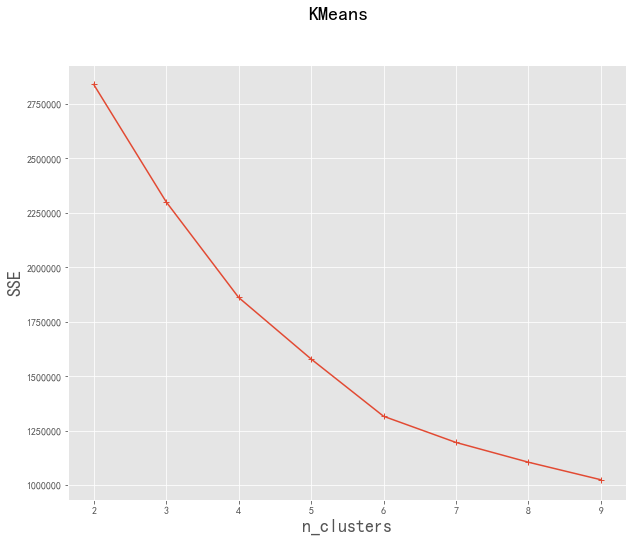

In [81]:
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("n_clusters", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()

In [82]:
# 调用k-means算法，进行聚类分析
kmodel = KMeans(n_clusters = 4)
kmodel.fit(data_col) #训练模型
kmodel.cluster_centers_ #查看聚类中心
kmodel.labels_ #查看各样本对应的类别

array([1, 1, 1, ..., 1, 1, 1])

In [83]:
r1 = pd.Series(kmodel.labels_).value_counts() # 统计频数
r2 = pd.DataFrame(kmodel.cluster_centers_) # 聚类中心
r = pd.concat([r2,r1],axis=1)
r.columns = list(data_col.columns) + ['聚类个数']
r

,ordernum_oneyear,avgprice,starprefer,customer_value_profit,ctrip_profits,lasthtlordergap,聚类个数
0,-0.048544,1.367293,1.214514,0.329145,0.303208,-0.018684,109753
1,-0.113422,-0.380600,-0.293341,-0.295739,-0.292377,-0.339649,465899
2,2.385709,1.223016,0.960344,3.245684,3.124609,-0.490195,40066
3,-0.501790,-0.290997,-0.471344,-0.379046,-0.296576,2.423613,74227


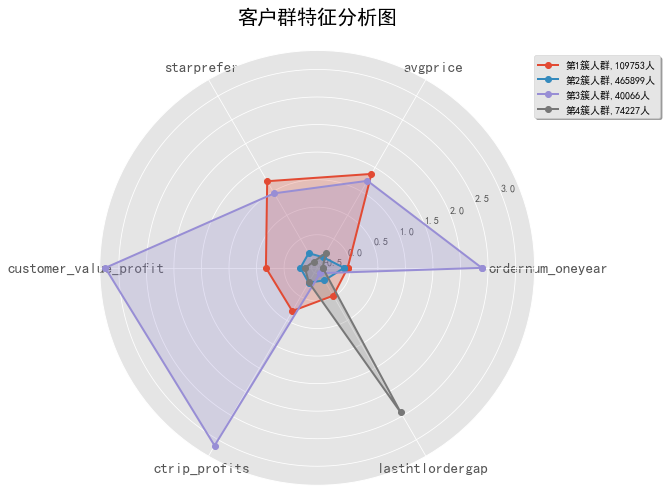

In [84]:
r1 = pd.Series(kmodel.labels_).value_counts()  # 统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_)  # 找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis=1)  # 横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(data_col) + [u'类别数目']  # 重命名表头

# 绘图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ['ordernum_oneyear','avgprice','starprefer','customer_value_profit','ctrip_profits','lasthtlordergap']
N = len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1], [v[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label="第%d簇人群,%d人" % (i + 1, v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180 / np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min - 0.1, max + 0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), ncol=1, fancybox=True, shadow=True)

# 显示图形
plt.show()